# First We'll import the necessary Libraries

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [121]:
# warnings
import warnings
warnings.filterwarnings("ignore")


# Set seaborn style
sns.set(style="whitegrid")

# Loading the Dataset

In [122]:
# Load data
df = pd.read_csv('teen_phone_addiction_dataset.csv')

# Initiate Exploratory Data Analysis(EDA) or Preprocessing

In [123]:
print("Shape:", df.shape)

Shape: (3000, 25)


In [124]:
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

**Dropping the Unnecessary Columns**

In [126]:
df = df = df.drop(['ID', 'Name', 'Location'],axis=1)

In [127]:
df.head()

,Age,Gender,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,13,Female,9th,4.0,6.1,78,5,0.1,10,3,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,17,Female,7th,5.5,6.5,70,5,0.0,3,7,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,13,Other,11th,5.8,5.5,93,8,0.8,2,3,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,18,Female,12th,3.1,3.9,78,8,1.6,9,10,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,14,Other,9th,2.5,6.7,56,4,1.1,1,5,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3000 non-null   int64  
 1   Gender                  3000 non-null   object 
 2   School_Grade            3000 non-null   object 
 3   Daily_Usage_Hours       3000 non-null   float64
 4   Sleep_Hours             3000 non-null   float64
 5   Academic_Performance    3000 non-null   int64  
 6   Social_Interactions     3000 non-null   int64  
 7   Exercise_Hours          3000 non-null   float64
 8   Anxiety_Level           3000 non-null   int64  
 9   Depression_Level        3000 non-null   int64  
 10  Self_Esteem             3000 non-null   int64  
 11  Parental_Control        3000 non-null   int64  
 12  Screen_Time_Before_Bed  3000 non-null   float64
 13  Phone_Checks_Per_Day    3000 non-null   int64  
 14  Apps_Used_Daily         3000 non-null   

**Changing the School_Grade column values from string to int**

In [129]:
df['School_Grade']=df['School_Grade'].str.extract('(\d+)',expand=False).astype(int)

In [130]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include='object').columns

# *Boxplots to find the outliers*

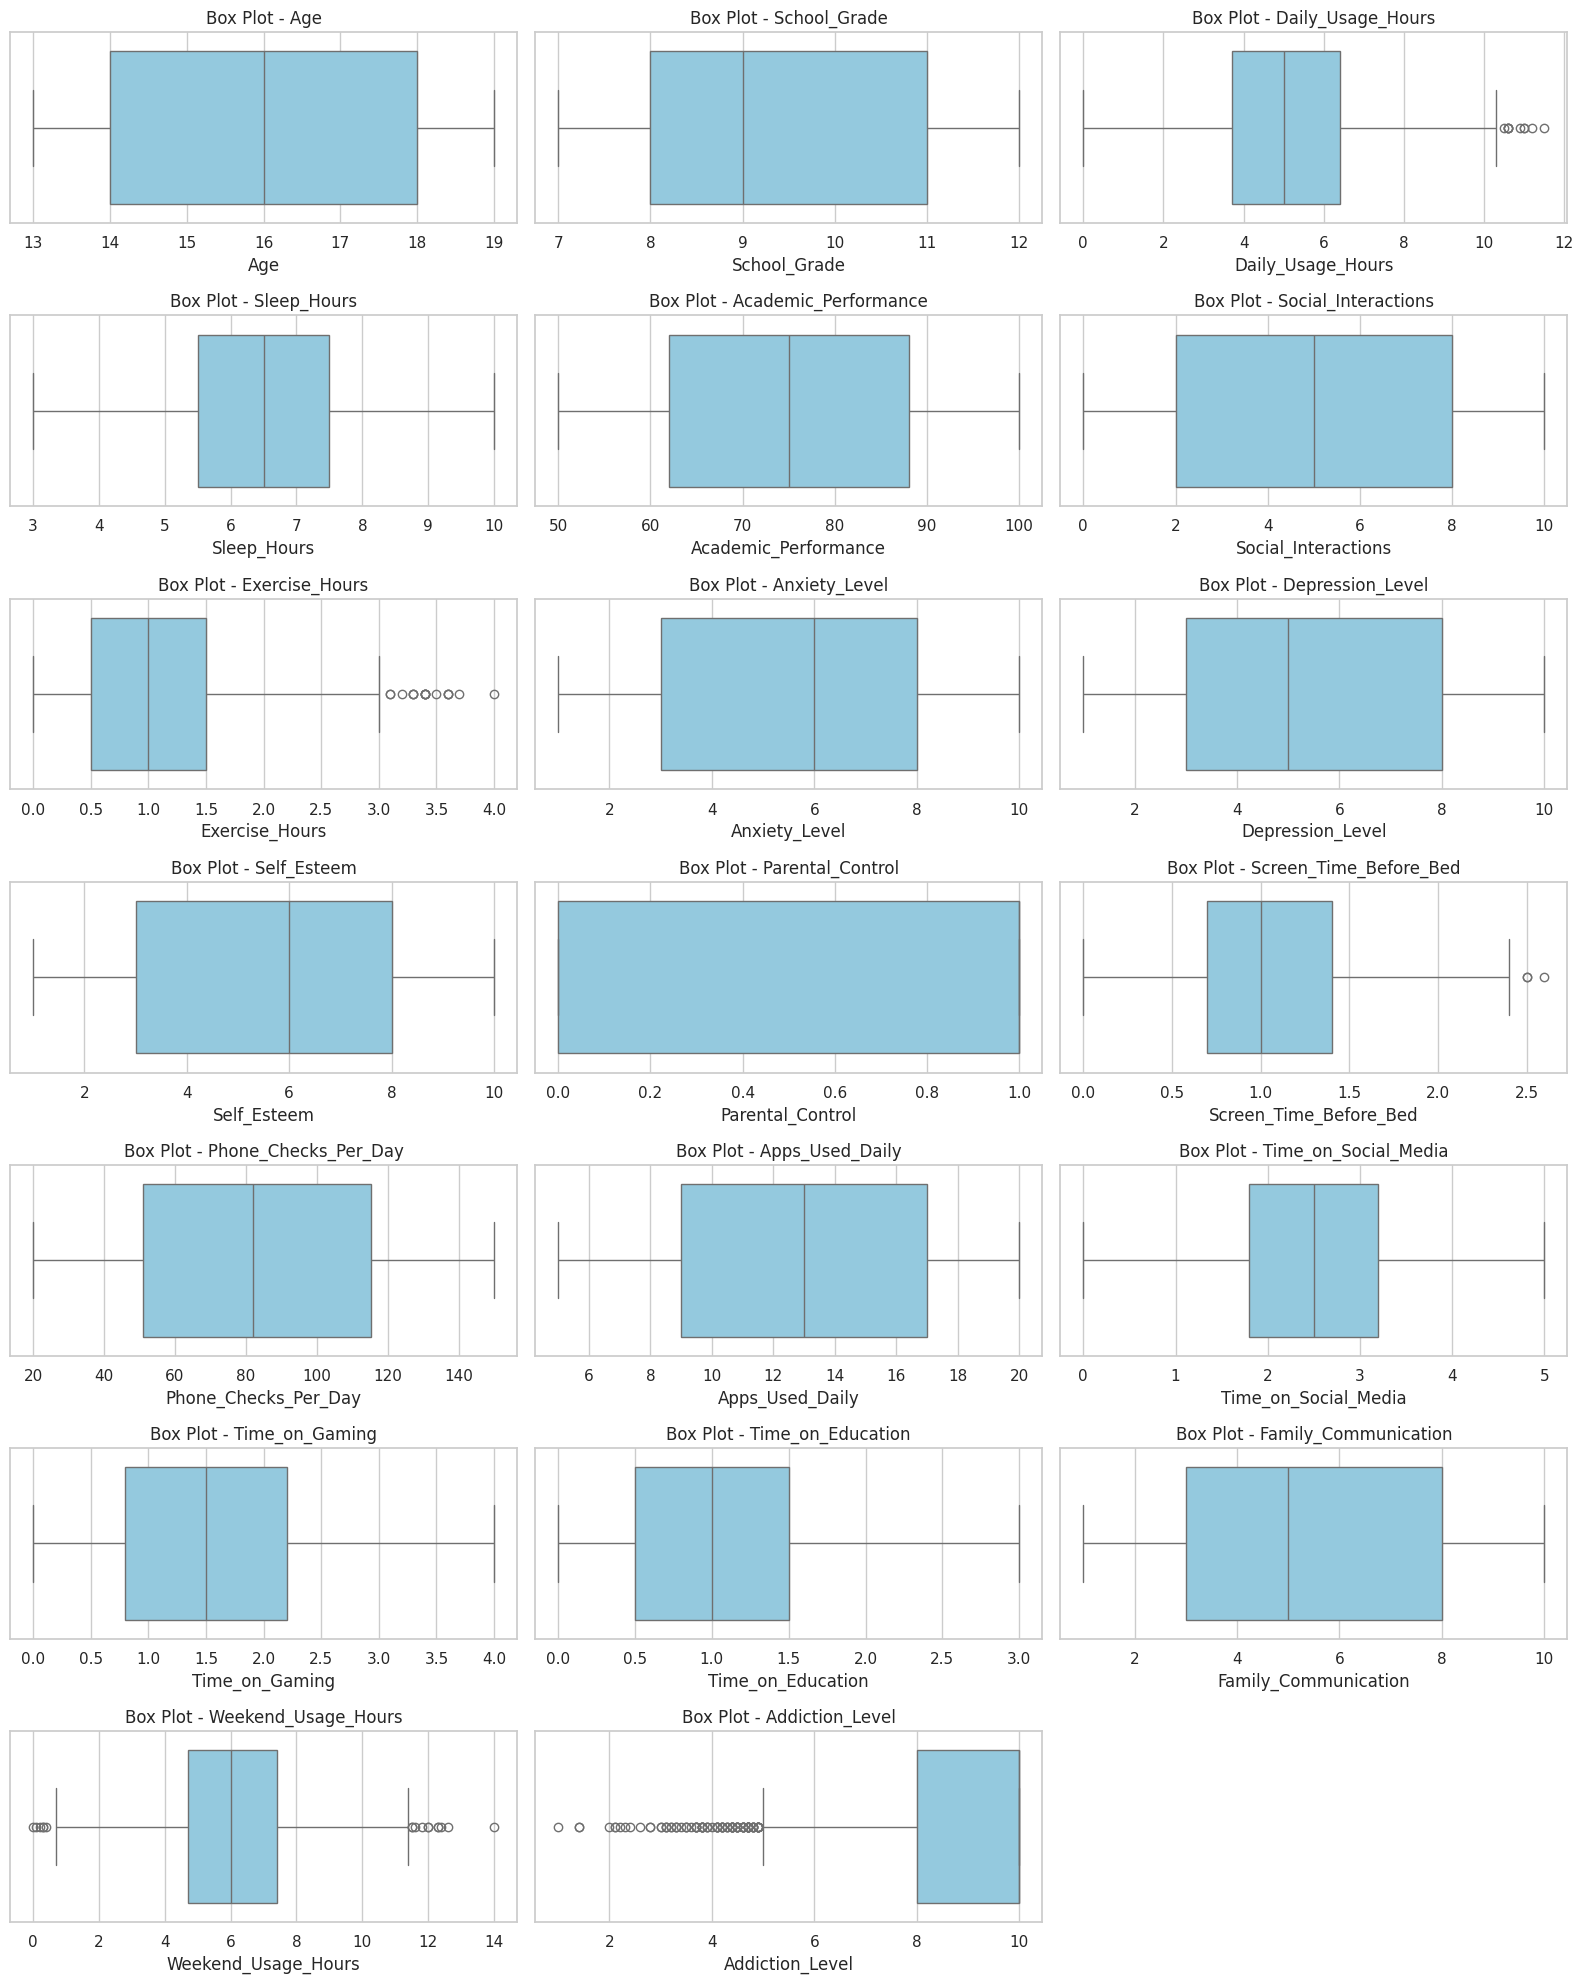

In [131]:
plt.figure(figsize=(16, 20))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) + 2) // 3, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Box Plot - {col}')
    plt.tight_layout()
plt.show()

# *Histograms to show the distribution of the Numerical features*

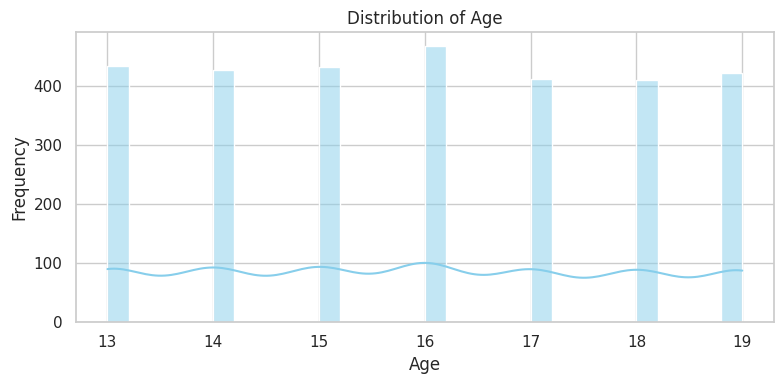

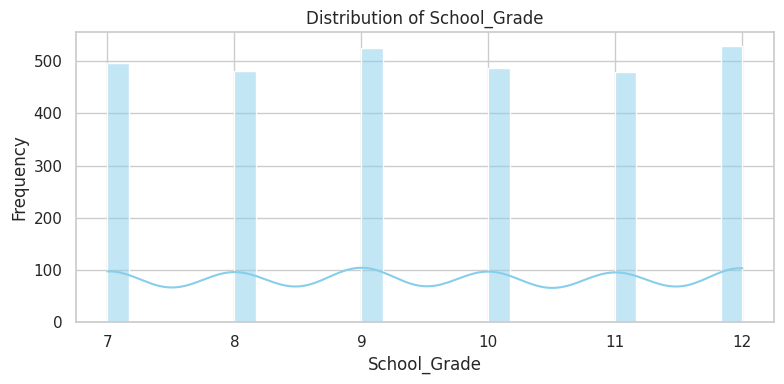

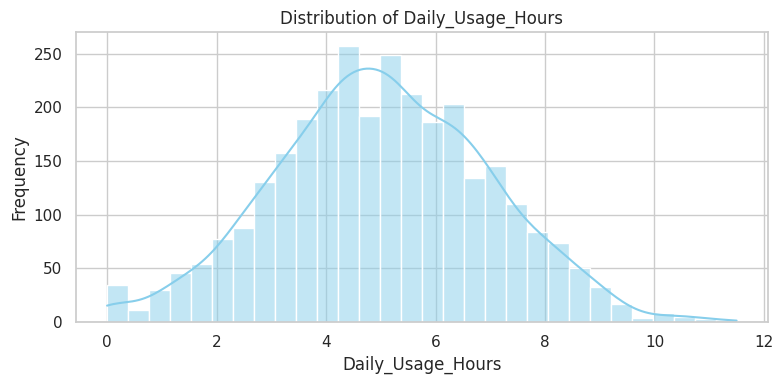

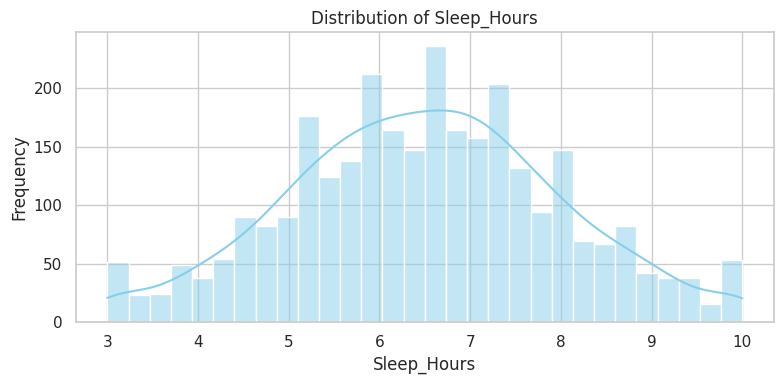

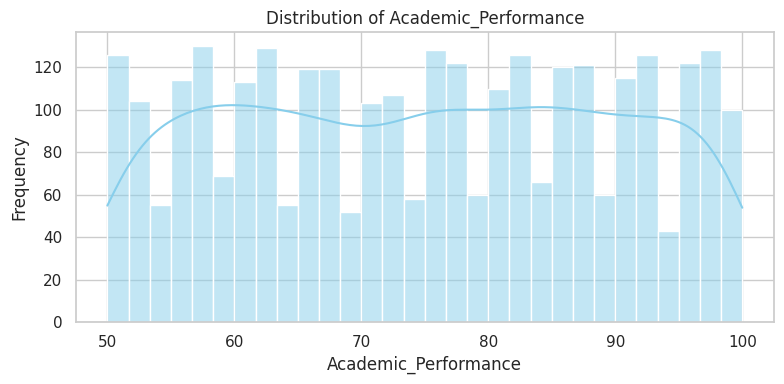

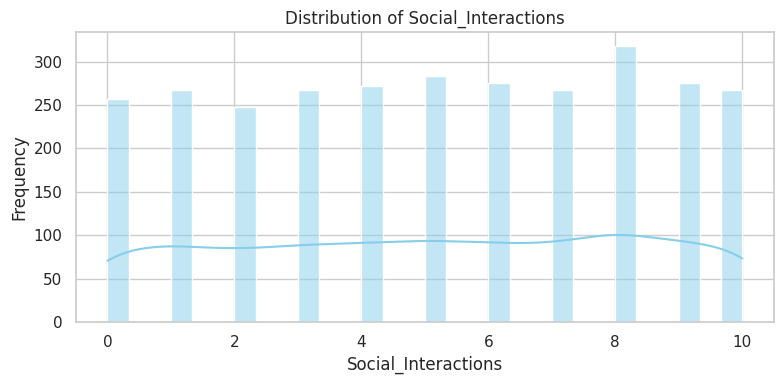

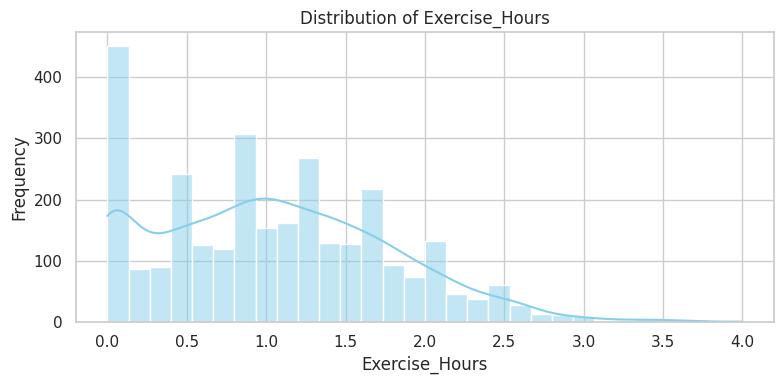

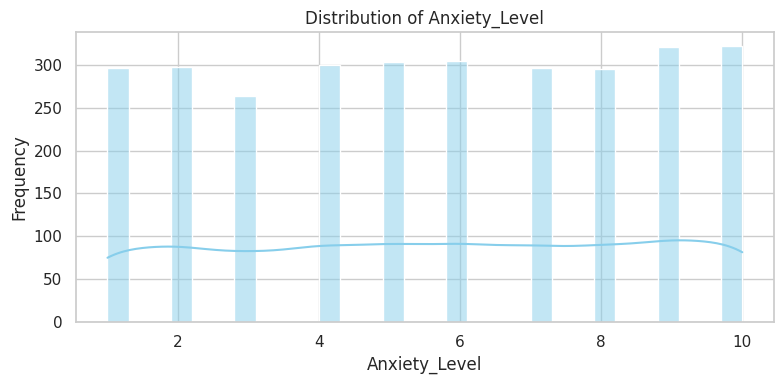

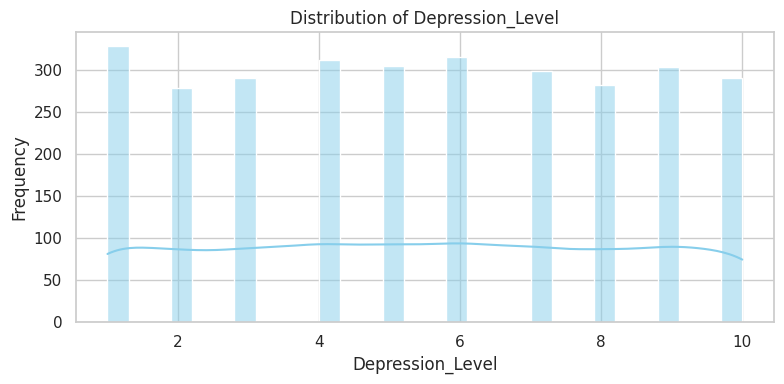

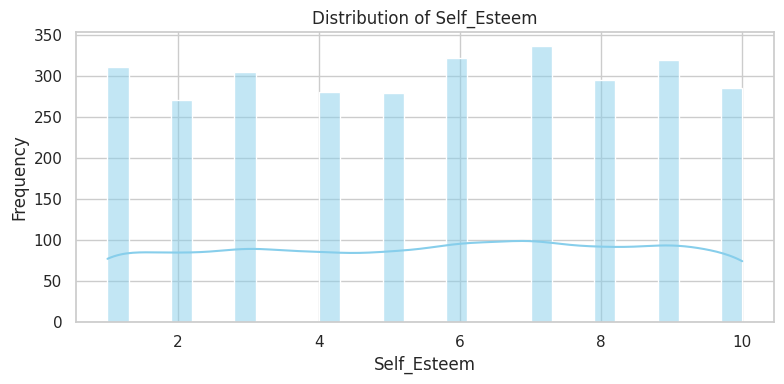

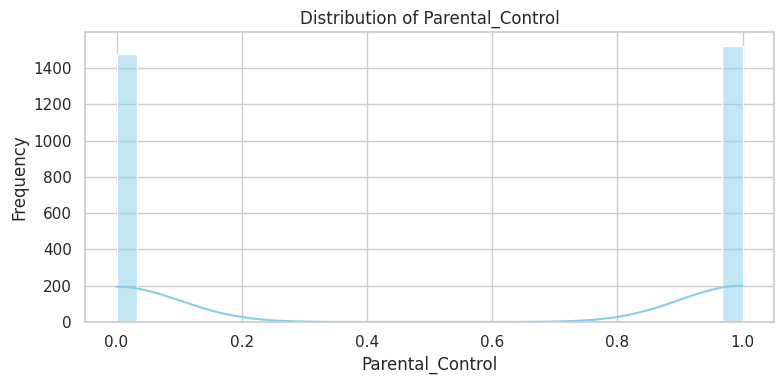

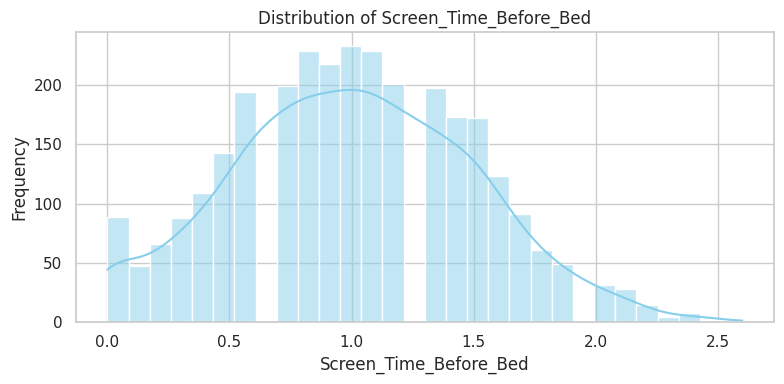

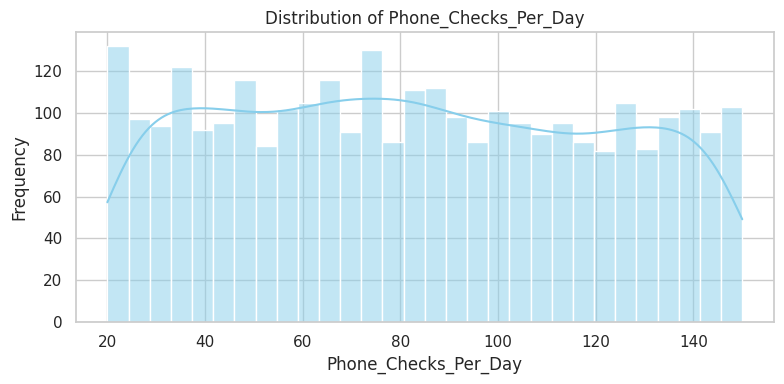

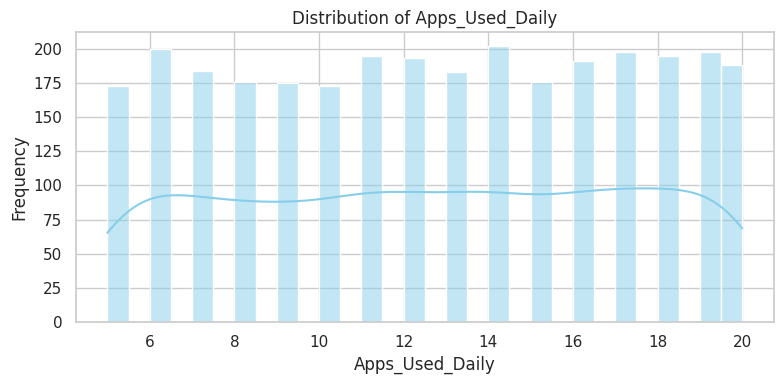

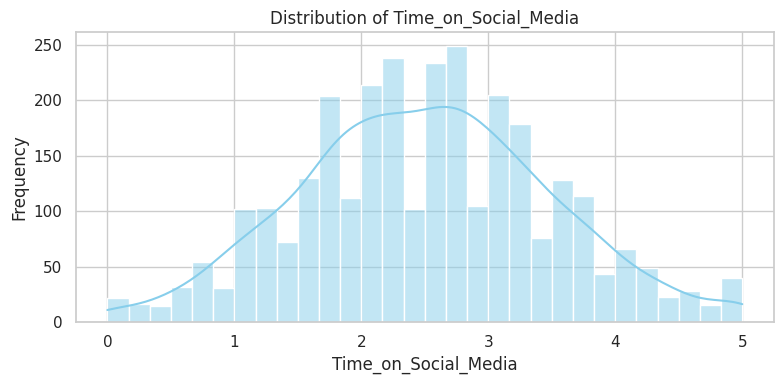

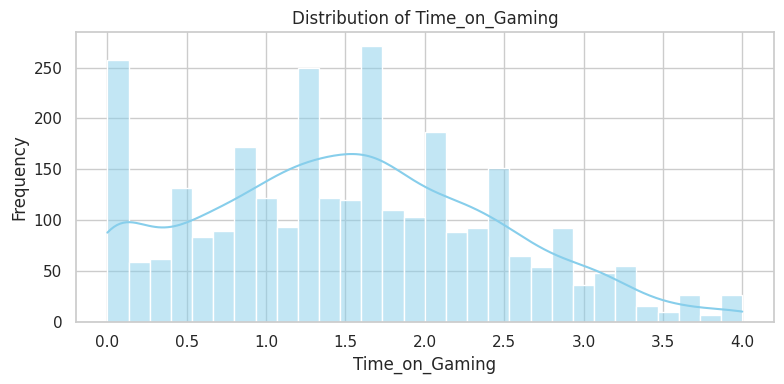

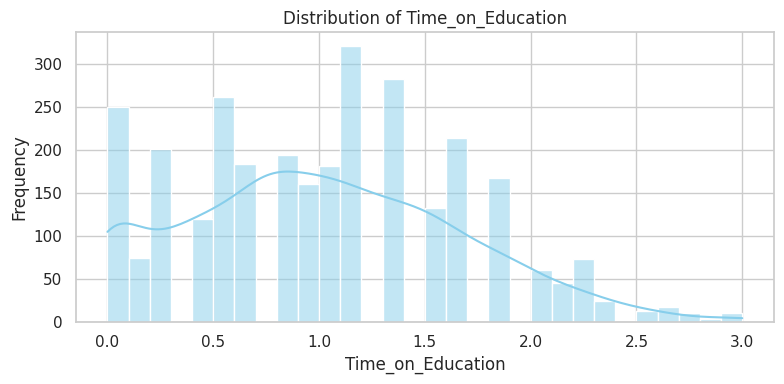

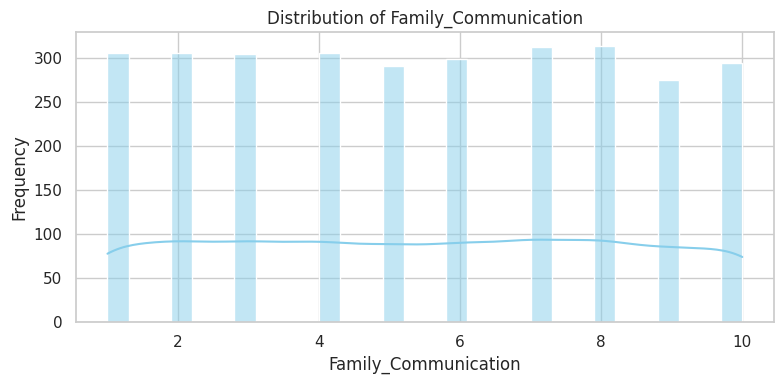

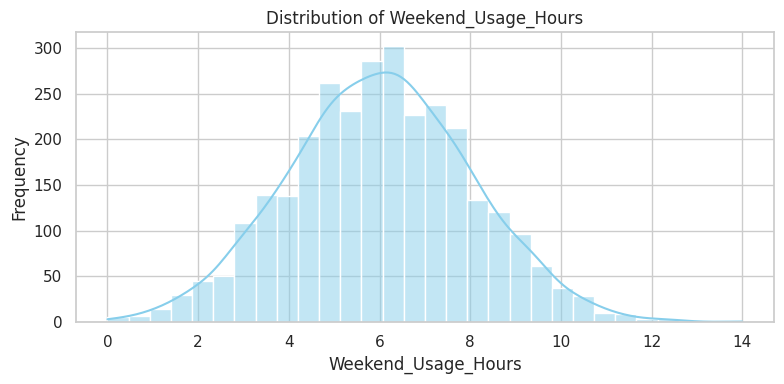

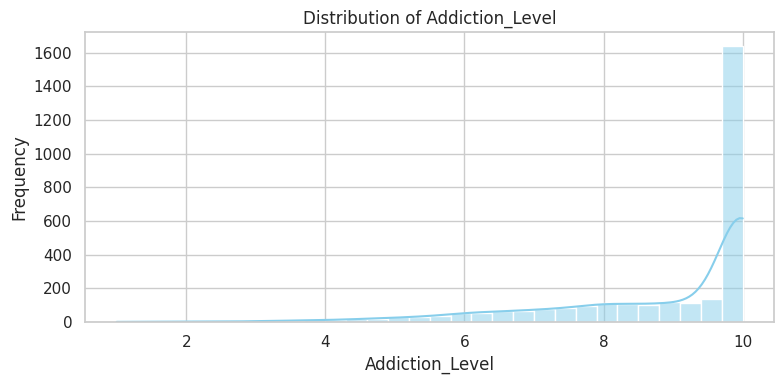

In [132]:
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# *Countplots to show the Frequency of each category in categorical features*

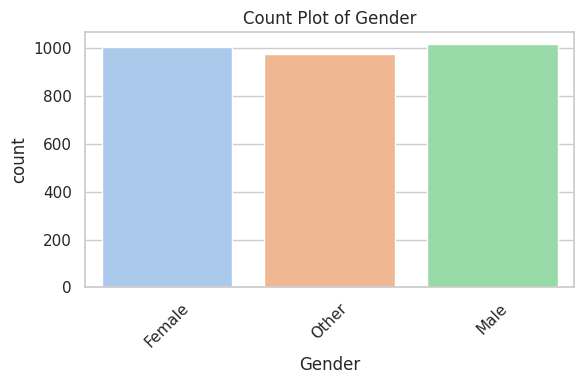

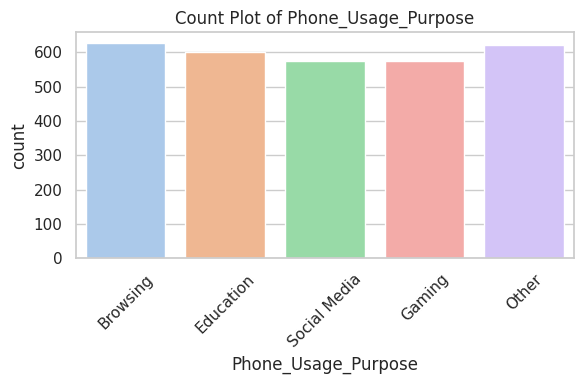

In [133]:
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# *Pairplots to Explore feature interactions visually*

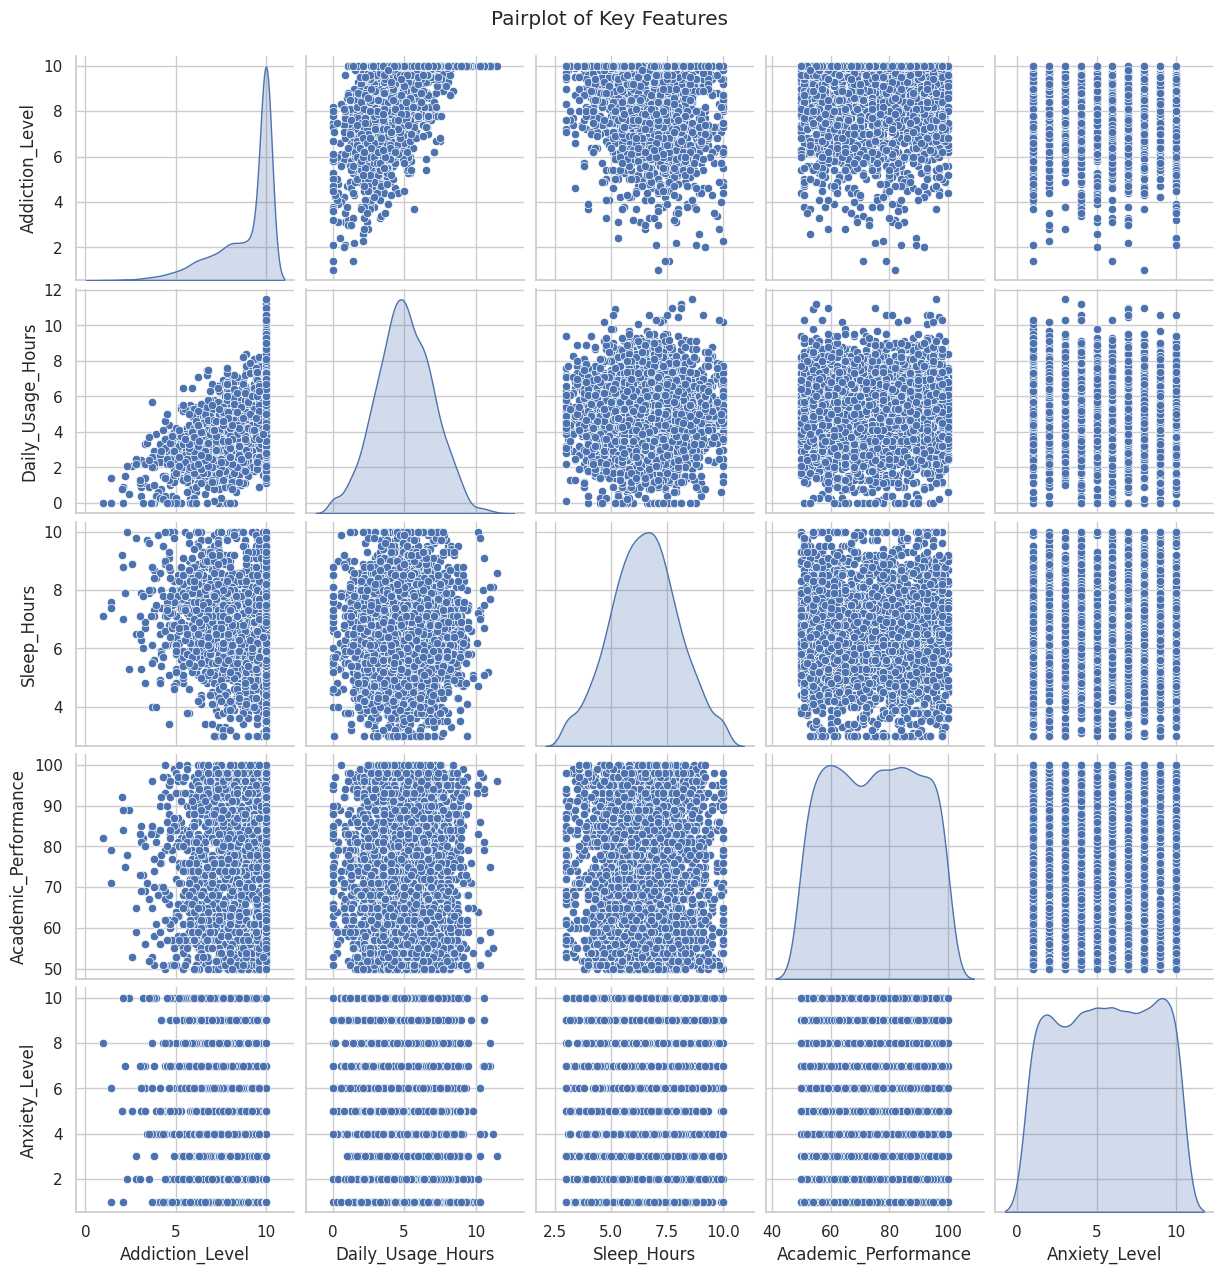

In [134]:
selected_cols = [
    'Addiction_Level', 'Daily_Usage_Hours', 'Sleep_Hours',
    'Academic_Performance', 'Anxiety_Level'
]
sns.pairplot(df[selected_cols], diag_kind='kde')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

# *Heatmap to see feature-to-feature correlation*

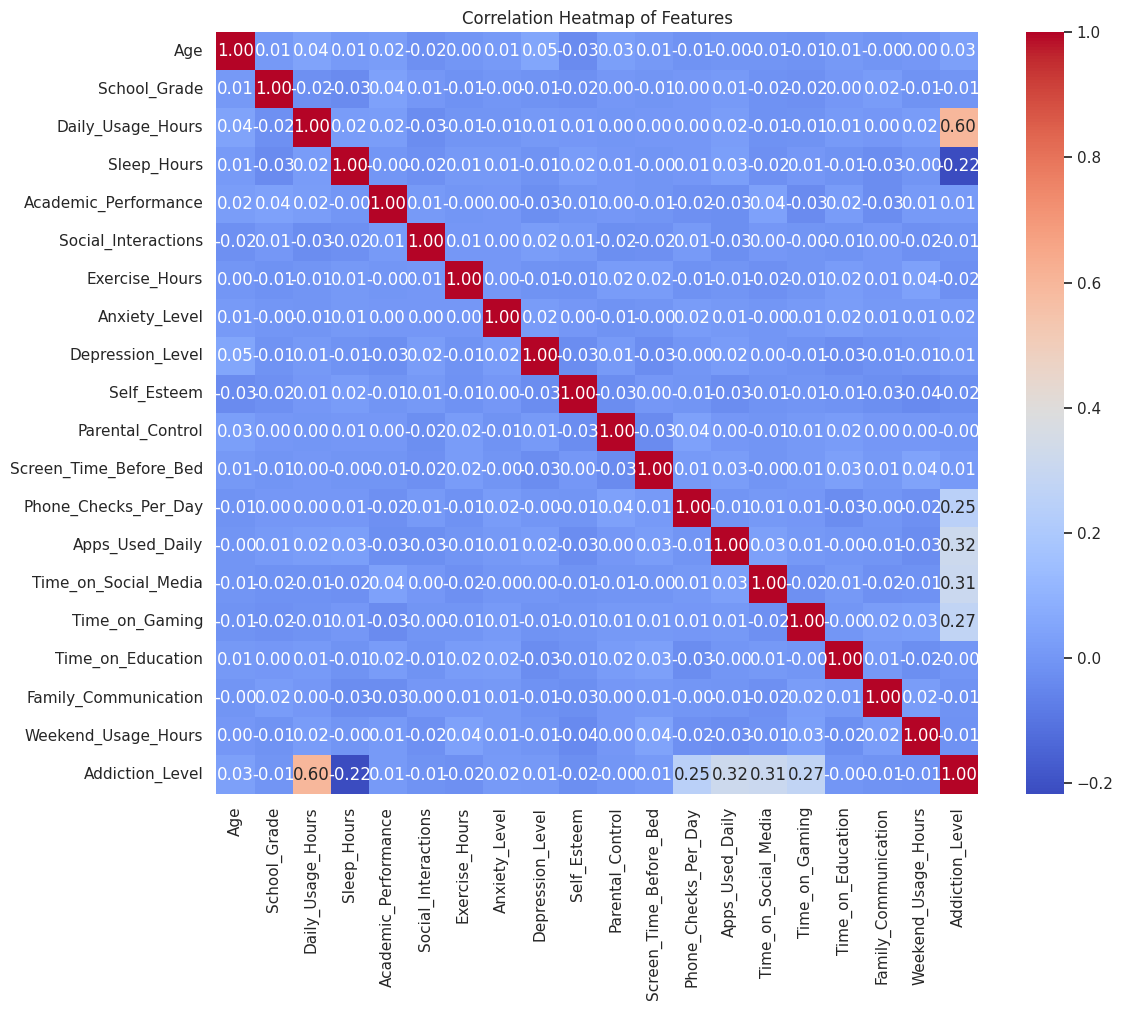

In [135]:
plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

# Using One Hot Encoding to convert the categorical columns into values that our Neural Network can use to predict

In [136]:
df['Gender'].value_counts()

,count
Gender,
Male,1016
Female,1007
Other,977


In [137]:
df['Phone_Usage_Purpose'].value_counts()

,count
Phone_Usage_Purpose,
Browsing,627
Other,622
Education,602
Social Media,575
Gaming,574


In [138]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_features = df[['Gender', 'Phone_Usage_Purpose']]
encoded_array = encoder.fit_transform(categorical_features)
encoded_columns = encoder.get_feature_names_out(['Gender', 'Phone_Usage_Purpose'])
encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns)

In [139]:
# Drop original categorical columns and merge with encoded
df = df.drop(columns=['Gender', 'Phone_Usage_Purpose']).reset_index(drop=True)
df_encoded = pd.concat([df, encoded_df], axis=1)

In [140]:
df_encoded.head()

,Age,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,...,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Addiction_Level,Gender_Male,Gender_Other,Phone_Usage_Purpose_Education,Phone_Usage_Purpose_Gaming,Phone_Usage_Purpose_Other,Phone_Usage_Purpose_Social Media
0,13,9,4.0,6.1,78,5,0.1,10,3,8,...,1.2,4,8.7,10.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,7,5.5,6.5,70,5,0.0,3,7,3,...,1.8,2,5.3,10.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13,11,5.8,5.5,93,8,0.8,2,3,10,...,0.4,6,5.7,9.2,0.0,1.0,1.0,0.0,0.0,0.0
3,18,12,3.1,3.9,78,8,1.6,9,10,3,...,0.8,8,3.0,9.8,0.0,0.0,0.0,0.0,0.0,1.0
4,14,9,2.5,6.7,56,4,1.1,1,5,1,...,1.1,10,3.7,8.6,0.0,1.0,0.0,1.0,0.0,0.0


In [141]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               3000 non-null   int64  
 1   School_Grade                      3000 non-null   int64  
 2   Daily_Usage_Hours                 3000 non-null   float64
 3   Sleep_Hours                       3000 non-null   float64
 4   Academic_Performance              3000 non-null   int64  
 5   Social_Interactions               3000 non-null   int64  
 6   Exercise_Hours                    3000 non-null   float64
 7   Anxiety_Level                     3000 non-null   int64  
 8   Depression_Level                  3000 non-null   int64  
 9   Self_Esteem                       3000 non-null   int64  
 10  Parental_Control                  3000 non-null   int64  
 11  Screen_Time_Before_Bed            3000 non-null   float64
 12  Phone_

# Splitting the features and target

In [142]:
# Split features and target
X = df_encoded.drop(columns='Addiction_Level')
y = df_encoded['Addiction_Level']

In [143]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#**Building The Neural Network**

In [145]:
# Build neural network
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Regression output
])

In [146]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [147]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 50.7341 - mae: 6.7756 - val_loss: 4.5329 - val_mae: 1.7613
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4623 - mae: 1.4931 - val_loss: 2.4556 - val_mae: 1.2864
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1077 - mae: 1.1607 - val_loss: 2.0878 - val_mae: 1.1883
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7415 - mae: 1.0526 - val_loss: 1.9296 - val_mae: 1.1338
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6250 - mae: 1.0132 - val_loss: 1.8024 - val_mae: 1.0956
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5613 - mae: 0.9870 - val_loss: 1.7082 - val_mae: 1.0620
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3750 - mae: 0.9276 - val_loss: 1.6312 - val_mae: 1.0281
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3787 - mae: 0.9270 - val_loss: 1.5368 - val_mae: 1.0045
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1174 - mae:

#Predicting On Tes Set

In [148]:
# Predict on test set
y_pred = model.predict(X_test_scaled).flatten()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


#Evaluation

In [149]:
# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [150]:
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.2946
MSE: 0.1381
RMSE: 0.3716
R² Score: 0.9452


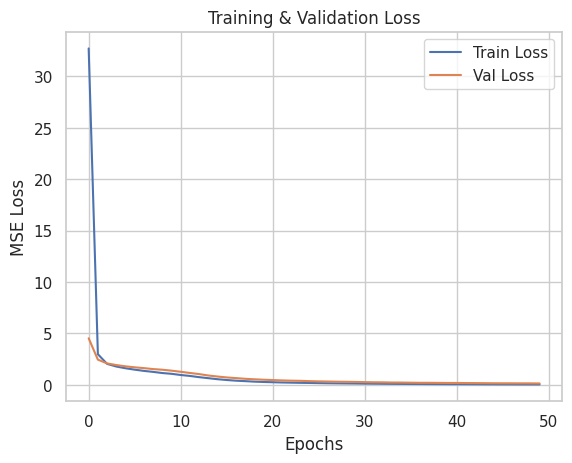

In [151]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

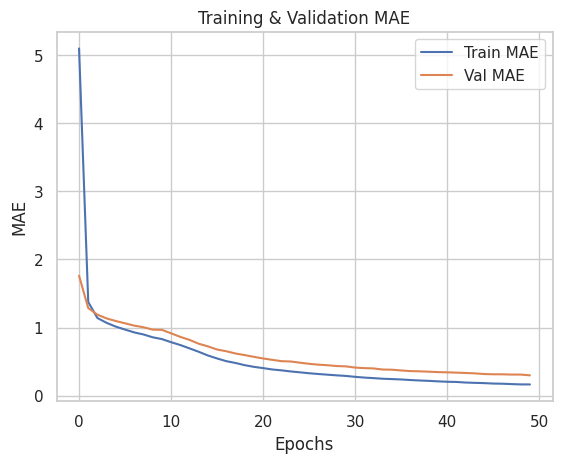

In [152]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.title("Training & Validation MAE")
plt.show()

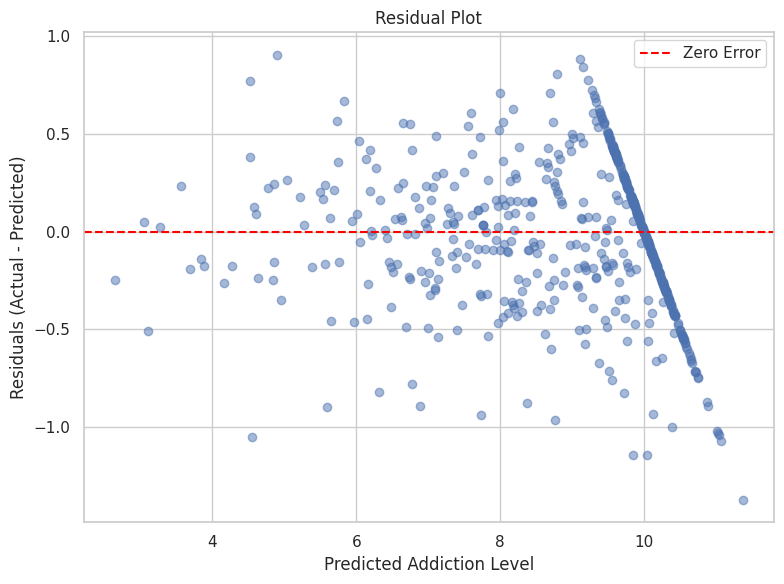

In [154]:
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', label='Zero Error')
plt.xlabel('Predicted Addiction Level')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

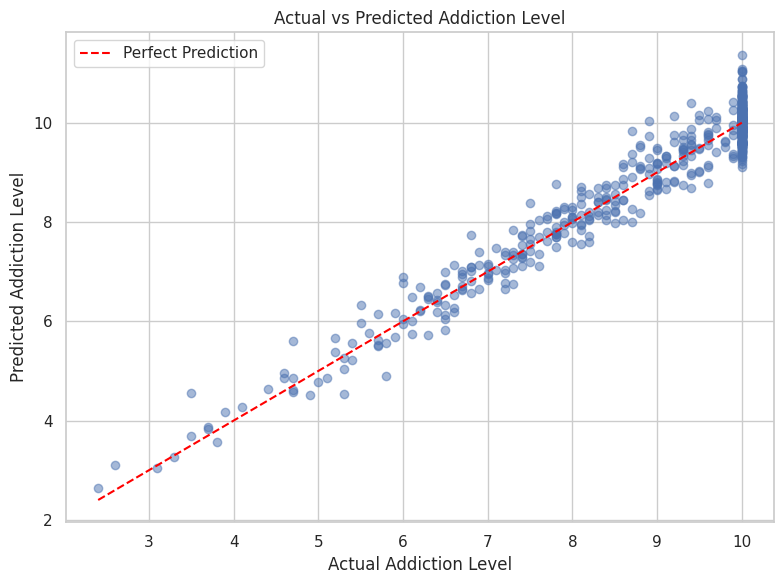

In [153]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Addiction Level')
plt.ylabel('Predicted Addiction Level')
plt.title('Actual vs Predicted Addiction Level')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()